In [24]:
graphics_toolkit("gnuplot"); % this line is needed only in Octave

## Analytické řešení difúzní úlohy v 1d + přidání konvektivního a reaktivního členu
Dirichletova úloha

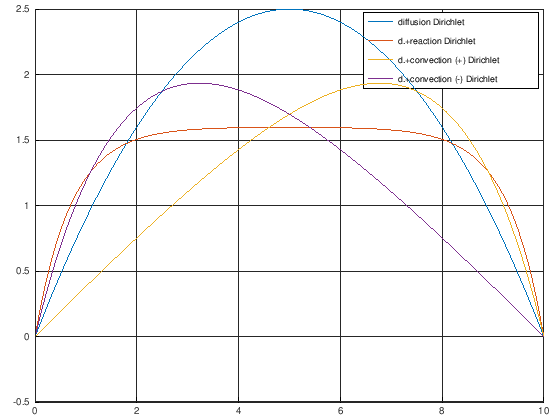

In [33]:
%% define 1d domain (0,L) and constants
L=10;
x=linspace(0,L,100);    % points of visualization
f=0.2;                  % sources (constant in whole domain
k=1;                    % material parameter (e.g. conductivity)
legend_items={};        % empty cell prepared for legend
figure; hold on         % empty figure

%% Diffusion with Dirichlet boundary conditions
%   -k*u''(x)=f     in (0,L)
%        u(0)=U0
%    	 u(L)=UL
U0=0;
UL=0;
u=@(x)-f/(2*k)*x.^2+f*L*x/(2*k)+(UL-U0)*x/L+U0;
plot(x,u(x))            % plot of the analytical solution
legend_items{end+1}='diffusion Dirichlet';  % append legend

%% Diffusion with Dirichlet boundary conditions + reaction
%   -k*u''(x)+k0*u(x)=g     in (0,L)
%                u(0)=U0
%    	         u(L)=UL
k0=2;       % EXAMINE EFFECT OF CHANGING THIS CONSTANT
Uhat=1.5;	% EXAMINE EFFECT OF CHANGING THIS CONSTANT
g=f+k0*Uhat;
% analytical solution:
K=sqrt(k0/k);
gk=g/k0;
C1=(UL-(U0-gk)*exp(K*L)-gk)/(exp(-K*L)-exp(K*L));
C2=U0-C1-g/k0;
u=@(x)C1*exp(-K*x)+C2*exp(K*x)+g/k0;
plot(x,u(x))   % plot of the analytical solution
legend_items{end+1}='d.+reaction Dirichlet';	% append legend

%% Diffusion with Dirichlet boundary conditions + convection
%   -k*u''(x)+D*u'(x)=f     in (0,L)
%                u(0)=U
%    	         u(L)=UL
D=0.5;    % EXAMINE EFFECT OF CHANGING THIS CONSTANT
% analytical solution:
C2=(UL-U0-f*L/D)/(exp(D*L/k)-1);
C1=U0-C2;
u=@(x)C1+C2*exp(D/k*x)+f/D*x;
plot(x,u(x))            % plot of the analytical solution
legend_items{end+1}='d.+convection (+) Dirichlet';  % append legend

%% Diffusion with Dirichlet boundary conditions + convection
%   -k*u''(x)+D*u'(x)=f     in (0,L)
%                u(0)=U
%    	         u(L)=UL
D=-0.5;    % EXAMINE EFFECT OF CHANGING THIS CONSTANT
% analytical solution:
C2=(UL-U0-f*L/D)/(exp(D*L/k)-1);
C1=U0-C2;
u=@(x)C1+C2*exp(D/k*x)+f/D*x;
plot(x,u(x))            % plot of the analytical solution
legend_items{end+1}='d.+convection (-) Dirichlet';  % append legend

legend(legend_items);                               % show legend
grid on